IntSlider(value=8, description='Bit Depth:', max=8, min=1)

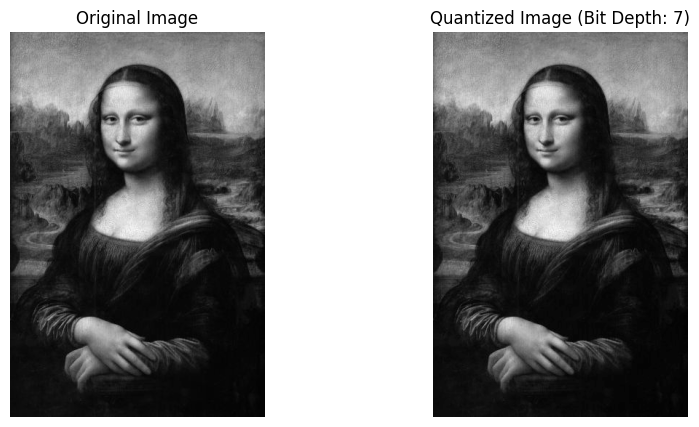

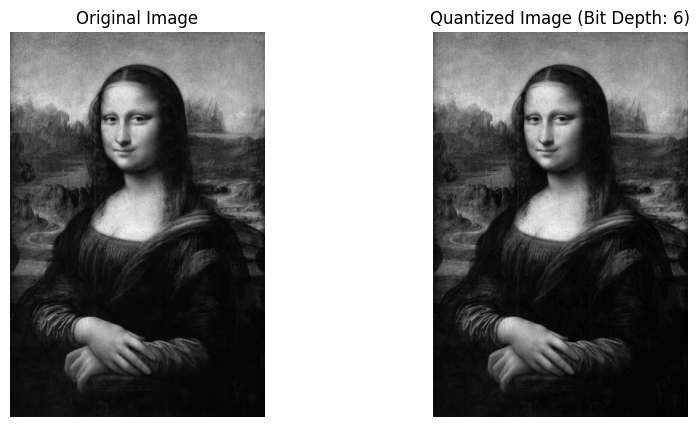

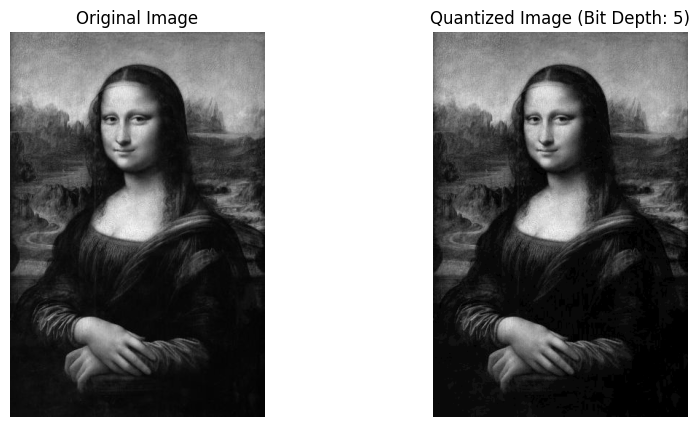

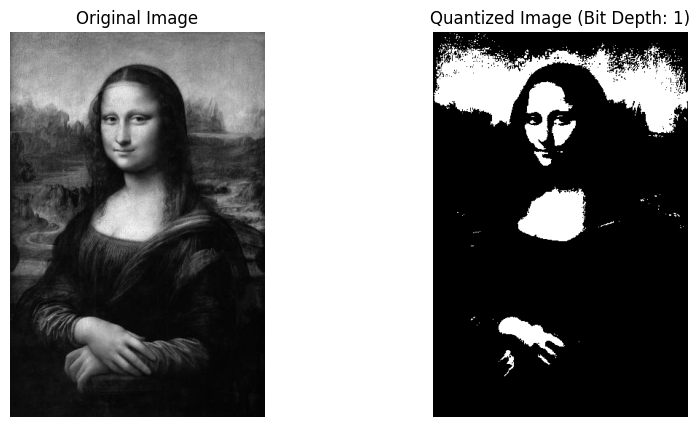

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import ipywidgets as widgets
from IPython.display import display, clear_output
import requests
from io import BytesIO

# Load an image from a URL
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale
    return np.array(img)

# Quantize the image
def quantize_image(image, bit_depth):
    max_val = 2**bit_depth
    step = 256/max_val
    quantized_image = np.floor(image/step) * step
    return quantized_image.astype(np.uint8)

# Display the original and quantized image
def display_images(original, quantized):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original, cmap='gray')
    ax[0].set_title("Original Image")
    ax[0].axis('off')

    ax[1].imshow(quantized, cmap='gray')
    ax[1].set_title(f"Quantized Image (Bit Depth: {bit_depth_slider.value})")
    ax[1].axis('off')

    plt.show()

# URL of your image
image_url = 'https://images.squarespace-cdn.com/content/v1/555510e6e4b0ecb85ccf4059/1441217664123-FTG14B8CIP65WN98JBE7/Mona_Lisa_GS2.jpg'  # Replace with your image URL
image = load_image_from_url(image_url)

# Create a slider
bit_depth_slider = widgets.IntSlider(value=8, min=1, max=8, step=1, description='Bit Depth:')
display(bit_depth_slider)

def update_image(change):
    quantized = quantize_image(image, bit_depth_slider.value)
    display_images(image, quantized)

bit_depth_slider.observe(update_image, names='value')

